In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

import os
os.environ['KAGGLE_USERNAME'] = 'worosa'
os.environ['KAGGLE_KEY'] = 'feed01f37299bea03c690bc5e3621bfb'

!kaggle datasets download -d shaunthesheep/microsoft-catsvsdogs-dataset
!unzip -u -qq microsoft-catsvsdogs-dataset

#corrupted or useless files
!rm 'MSR-LA - 3467.docx'
!rm 'readme[1].txt'
#!rm 'PetImages/Cat/7968.jpg'
!rm 'PetImages/Cat/666.jpg'
#!rm 'PetImages/Dog/7112.jpg'
!rm 'PetImages/Dog/11702.jpg'
#!rm 'PetImages/Cat/untitled'
!rm 'PetImages/Dog/Thumbs.db'
!rm 'PetImages/Cat/Thumbs.db'

100% 787M/788M [00:05<00:00, 163MB/s]
100% 788M/788M [00:05<00:00, 153MB/s]


In [ ]:
batch_size = 128
img_height = 224
img_width = 224

In [ ]:
from PIL import Image
import os, sys

def resize():
    for item in dirs:
        if os.path.isfile(path+item):
            im = Image.open(path+item).convert('RGB')
            f, e = os.path.splitext(path+item)
            imResize = im.resize((img_height, img_width), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=100)
            print(path+item)

path = "PetImages/Cat/"
dirs = os.listdir( path )

resize()

path = "PetImages/Dog/"
dirs = os.listdir( path )

resize()

Output streaming troncato alle ultime 5000 righe.
PetImages/Dog/9599.jpg
PetImages/Dog/11416.jpg
PetImages/Dog/463.jpg
PetImages/Dog/1621.jpg
PetImages/Dog/2877.jpg
PetImages/Dog/3091.jpg
PetImages/Dog/12020.jpg
PetImages/Dog/9078.jpg
PetImages/Dog/6854.jpg
PetImages/Dog/10803.jpg
PetImages/Dog/11860.jpg
PetImages/Dog/10385.jpg
PetImages/Dog/10995.jpg
PetImages/Dog/7861.jpg
PetImages/Dog/6531.jpg
PetImages/Dog/1832.jpg
PetImages/Dog/12131.jpg
PetImages/Dog/11570.jpg
PetImages/Dog/8023.jpg
PetImages/Dog/8593.jpg
PetImages/Dog/2408.jpg
PetImages/Dog/11037.jpg
PetImages/Dog/9217.jpg
PetImages/Dog/10580.jpg
PetImages/Dog/9441.jpg
PetImages/Dog/8844.jpg
PetImages/Dog/9501.jpg
PetImages/Dog/11461.jpg
PetImages/Dog/3267.jpg
PetImages/Dog/7652.jpg
PetImages/Dog/3789.jpg
PetImages/Dog/11492.jpg
PetImages/Dog/6568.jpg
PetImages/Dog/1397.jpg
PetImages/Dog/5087.jpg
PetImages/Dog/5922.jpg
PetImages/Dog/8558.jpg
PetImages/Dog/4285.jpg
PetImages/Dog/4280.jpg
PetImages/Dog/12304.jpg
PetImages/Dog/5777

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size, len(data), tag)
/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only

Output streaming troncato alle ultime 5000 righe.
PetImages/Dog/3622.jpg
PetImages/Dog/5014.jpg
PetImages/Dog/12329.jpg
PetImages/Dog/4995.jpg
PetImages/Dog/3412.jpg
PetImages/Dog/2424.jpg
PetImages/Dog/7163.jpg
PetImages/Dog/2462.jpg
PetImages/Dog/4642.jpg
PetImages/Dog/10992.jpg
PetImages/Dog/11023.jpg
PetImages/Dog/5527.jpg
PetImages/Dog/116.jpg
PetImages/Dog/11385.jpg
PetImages/Dog/5647.jpg
PetImages/Dog/9336.jpg
PetImages/Dog/5034.jpg
PetImages/Dog/91.jpg
PetImages/Dog/5421.jpg
PetImages/Dog/11120.jpg
PetImages/Dog/3369.jpg
PetImages/Dog/12238.jpg
PetImages/Dog/5416.jpg
PetImages/Dog/974.jpg
PetImages/Dog/7977.jpg
PetImages/Dog/11432.jpg
PetImages/Dog/5998.jpg
PetImages/Dog/9163.jpg
PetImages/Dog/962.jpg
PetImages/Dog/5412.jpg
PetImages/Dog/10622.jpg
PetImages/Dog/2020.jpg
PetImages/Dog/7552.jpg
PetImages/Dog/2077.jpg
PetImages/Dog/8309.jpg
PetImages/Dog/2584.jpg
PetImages/Dog/3947.jpg
PetImages/Dog/7623.jpg
PetImages/Dog/4345.jpg
PetImages/Dog/6240.jpg
PetImages/Dog/2138.jpg
PetI

In [ ]:
from keras.applications.vgg16 import VGG16
from keras.optimizers import SGD
from keras.layers import Flatten
from keras.layers import Dense
from keras.models import Model

# include_top=False beacuse I leave out the last fully connected layer
model = VGG16(include_top=False, input_shape=(img_height, img_width, 3))

# since we don’t have to train all the layers, we make them non_trainable
for layer in model.layers:
 layer.trainable = False

# flatten the output layer to 1 dimension
flat1 = Flatten()(model.layers[-1].output)
# add a fully connected layer with 128 hidden units and ReLU activation
class1 = Dense(128, activation='relu')(flat1)
# add a final sigmoid layer for classification
output = Dense(1, activation='sigmoid')(class1)
# define new model
model = Model(inputs=model.inputs, outputs=output)
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)

model.compile(optimizer=opt,
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# create data generator
train_augmentation = ImageDataGenerator(featurewise_center=True, #featurewise_center transforms the images to 0 mean
                                        validation_split=0.2)
# specify imagenet mean values for centering
# [123.68, 116.779, 103.939] is from ImageNet, we don not need to change it when we train our own dataset. This trick does not effect a lot.
train_augmentation.mean = [123.68, 116.779, 103.939]
# prepare iterator
train_generator = train_augmentation.flow_from_directory(
  "PetImages/",
  class_mode='binary',
  subset = "training",
  target_size=(img_height, img_width),
  batch_size=batch_size)

validation_generator = train_augmentation.flow_from_directory(
  "PetImages/",
  class_mode='binary',
  subset="validation",
  target_size=(img_height, img_width),
  batch_size=batch_size)

Found 20000 images belonging to 2 classes.
Found 4998 images belonging to 2 classes.


In [ ]:
history = model.fit(train_generator,
                    steps_per_epoch = len(train_generator),
                    validation_data = validation_generator,
                    validation_steps = len(validation_generator),
                    epochs=10,
                    verbose=1)
# evaluate model

_, acc = model.evaluate(validation_generator, steps = len(validation_generator), verbose=0)
print('accuracy > %.3f%%' % (acc * 100.0))

Epoch 1/10
157/157 [==============================] - 169s 697ms/step - loss: 0.7128 - accuracy: 0.9443 - val_loss: 0.0742 - val_accuracy: 0.9794
Epoch 2/10
157/157 [==============================] - 102s 647ms/step - loss: 0.0228 - accuracy: 0.9920 - val_loss: 0.0829 - val_accuracy: 0.9818
Epoch 3/10
157/157 [==============================] - 102s 647ms/step - loss: 0.0106 - accuracy: 0.9968 - val_loss: 0.0968 - val_accuracy: 0.9822
Epoch 4/10
157/157 [==============================] - 101s 647ms/step - loss: 0.0047 - accuracy: 0.9991 - val_loss: 0.0826 - val_accuracy: 0.9822
Epoch 5/10
157/157 [==============================] - 102s 647ms/step - loss: 0.0027 - accuracy: 0.9997 - val_loss: 0.1042 - val_accuracy: 0.9842
Epoch 6/10
157/157 [==============================] - 102s 648ms/step - loss: 0.0015 - accuracy: 0.9999 - val_loss: 0.0871 - val_accuracy: 0.9842
Epoch 7/10
157/157 [==============================] - 101s 647ms/step - loss: 0.0012 - accuracy: 0.9999 - val_loss: 0.1091 -

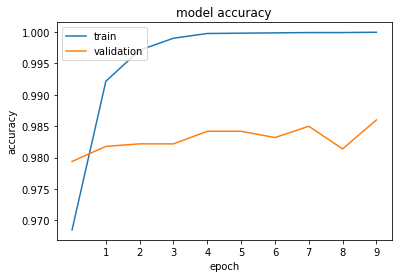

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xticks(range(1,10))
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='upper left')
plt.show()

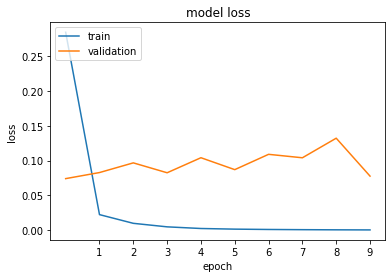

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(range(1,10))
plt.legend(['train'], loc='upper left')
plt.legend(['train','validation'], loc='upper left')
plt.show()

In [ ]:
!unzip -u -qq test_set

path = "test_set/Cat/"
dirs = os.listdir( path )

resize()

path = "test_set/Dog/"
dirs = os.listdir( path )

resize()

test_set/Cat/cat.4621.jpg
test_set/Cat/cat.4734.jpg
test_set/Cat/cat.4967.jpg
test_set/Cat/cat.4897.jpg
test_set/Cat/cat.4397.jpg
test_set/Cat/cat.4865.jpg
test_set/Cat/cat.4129.jpg
test_set/Cat/cat.4625.jpg
test_set/Cat/cat.4088.jpg
test_set/Cat/cat.4720.jpg
test_set/Cat/cat.4880.jpg
test_set/Cat/cat.4566.jpg
test_set/Cat/cat.4782.jpg
test_set/Cat/cat.4255.jpg
test_set/Cat/cat.4317.jpg
test_set/Cat/cat.4895.jpg
test_set/Cat/cat.4122.jpg
test_set/Cat/cat.4790.jpg
test_set/Cat/cat.4098.jpg
test_set/Cat/cat.4803(1).jpg
test_set/Cat/cat.4401.jpg
test_set/Cat/cat.4690.jpg
test_set/Cat/cat.4592.jpg
test_set/Cat/cat.4835.jpg
test_set/Cat/cat.4375.jpg
test_set/Cat/cat.4548.jpg
test_set/Cat/cat.4161.jpg
test_set/Cat/cat.4090.jpg
test_set/Cat/cat.4563.jpg
test_set/Cat/cat.4142.jpg
test_set/Cat/cat.4424.jpg
test_set/Cat/cat.4242.jpg
test_set/Cat/cat.4212.jpg
test_set/Cat/cat.4988.jpg
test_set/Cat/cat.4179.jpg
test_set/Cat/cat.4829.jpg
test_set/Cat/cat.4970.jpg
test_set/Cat/cat.4175.jpg
test_set/

In [ ]:
test_generator = ImageDataGenerator().flow_from_directory(
  "test_set/",
  class_mode='binary',
  target_size=(img_height, img_width),
  batch_size=batch_size,
  shuffle = False)

Found 2023 images belonging to 2 classes.


In [ ]:
#Generate predictions with the model
predictions = loaded_model.predict(test_generator, batch_size=batch_size, verbose=1, steps=len(test_generator))

16/16 [==============================] - 8s 543ms/step


In [ ]:
a = 0
b = 0
y_pred = []

for i in predictions:
  if (i >= 0.5):
    y_pred.append(1)
    a = a + 1
  if (i < 0.5):
    y_pred.append(0)
    b = b + 1
print(a)
print(b)

1009
1014


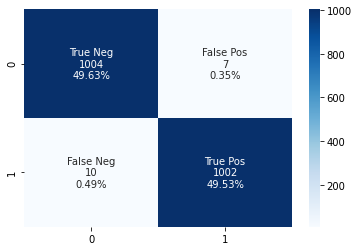

In [ ]:
from sklearn.metrics import confusion_matrix

#Get the confusion matrix
cf_matrix = confusion_matrix(test_generator.classes, y_pred)
#print(cf_matrix)
import seaborn as sns
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labelsP = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labelsP = np.asarray(labelsP).reshape(2,2)
sns.heatmap(cf_matrix, annot=labelsP, fmt='', cmap='Blues')

In [ ]:
precision = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[1])
recall = cf_matrix.flatten()[3] / (cf_matrix.flatten()[3] + cf_matrix.flatten()[2])
print('accuracy > %.2f' % precision)
print('recall > %.2f' % recall)